In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import math as m

## Task 2. 
Задати куб через його вершини. Здійснити масштабування куба (збільшення,зменшення у кілька разів). Записати відповідну матрицю.

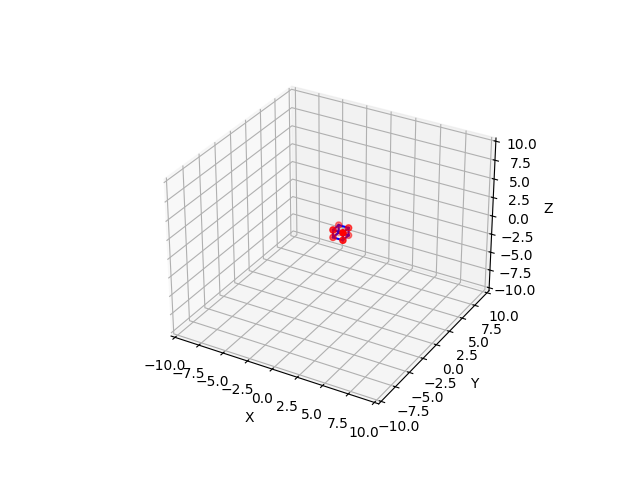

In [2]:
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.show()


In [3]:
M_scaling_x3 = np.array([[3, 0, 0, 0],
                [0, 3, 0, 0],
                [0, 0, 3, 0],
                [0, 0, 0, 1]])
vertices = np.stack((vertices[:, 0],vertices[:, 1], vertices[:, 2], np.ones(len(vertices))))
scaled_vertices = vertices.T.dot(M_scaling_x3)

(-10.0, 10.0)

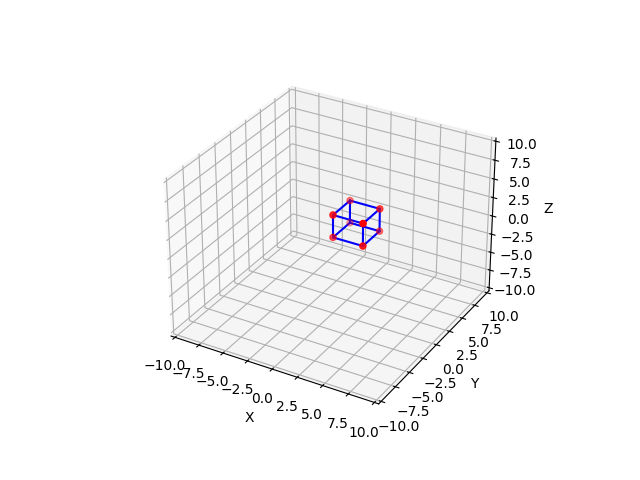

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_vertices[:,0], scaled_vertices[:,1], scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
            [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
            [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

In [5]:
M_scaling_x03 = np.array([[0.3, 0, 0, 0],
                [0, 0.3, 0, 0],
                [0, 0, 0.3, 0],
                [0, 0, 0, 1]])

under_scaled_vertices = vertices.T.dot(M_scaling_x03)

(-10.0, 10.0)

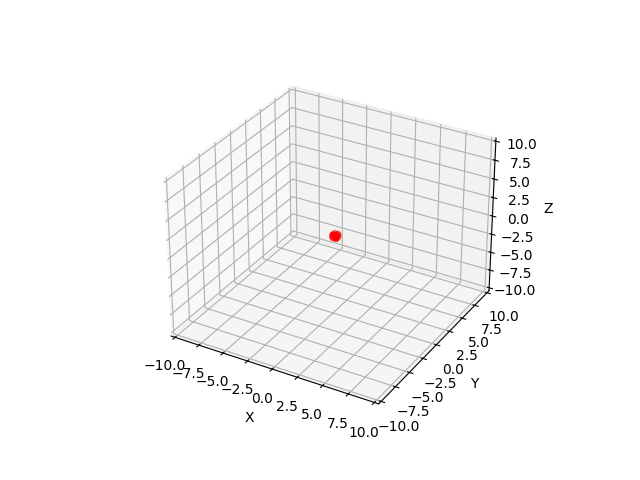

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(under_scaled_vertices[:,0], under_scaled_vertices[:,1], under_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([under_scaled_vertices[edge[0]][0], under_scaled_vertices[edge[1]][0]],
            [under_scaled_vertices[edge[0]][1], under_scaled_vertices[edge[1]][1]],
            [under_scaled_vertices[edge[0]][2], under_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


# Task 3. 
Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).

In [7]:
M_reflexion_xyz = np.array([[-1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, 1]])


reflected_scaled_vertices = scaled_vertices.dot(M_reflexion_xyz)

(-10.0, 10.0)

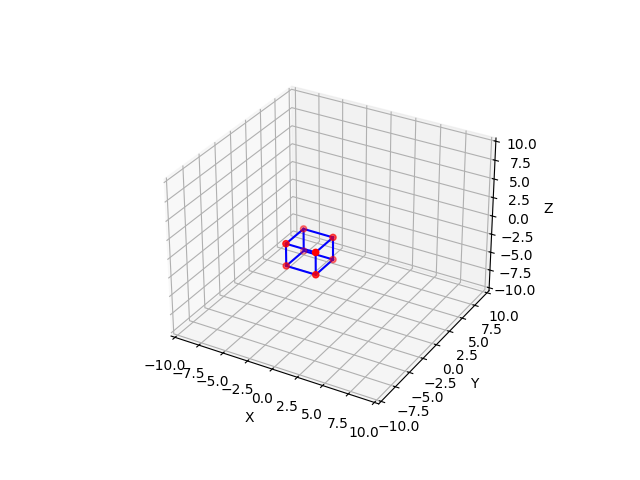

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reflected_scaled_vertices[:,0], reflected_scaled_vertices[:,1], reflected_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([reflected_scaled_vertices[edge[0]][0], reflected_scaled_vertices[edge[1]][0]],
            [reflected_scaled_vertices[edge[0]][1], reflected_scaled_vertices[edge[1]][1]],
            [reflected_scaled_vertices[edge[0]][2], reflected_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


In [9]:
M_reflexion_xy = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, 1]])


reflected_xy_scaled_vertices = scaled_vertices.dot(M_reflexion_xy)

(-10.0, 10.0)

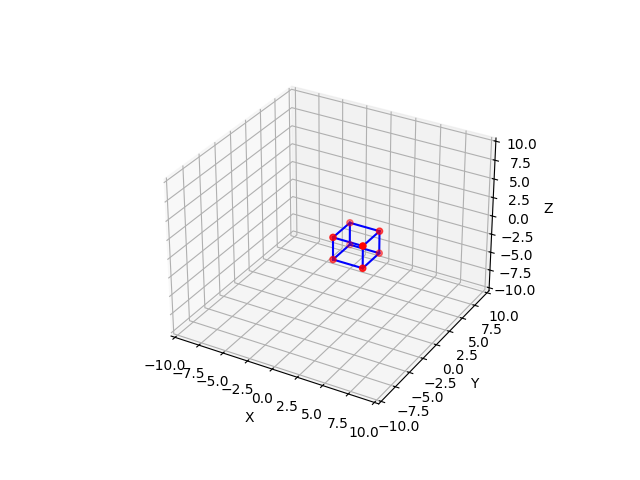

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reflected_xy_scaled_vertices[:,0], reflected_xy_scaled_vertices[:,1], reflected_xy_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([reflected_xy_scaled_vertices[edge[0]][0], reflected_xy_scaled_vertices[edge[1]][0]],
            [reflected_xy_scaled_vertices[edge[0]][1], reflected_xy_scaled_vertices[edge[1]][1]],
            [reflected_xy_scaled_vertices[edge[0]][2], reflected_xy_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


# Task 4
Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні для одержання такого результату.

## Set up the constants

In [11]:
vertices = np.array([
    [5, 5, 5, 1],
    [7, 5, 5, 1],
    [7, 7, 5, 1],
    [5, 7, 5, 1],
    [5, 5, 7, 1],
    [7, 5, 7, 1],
    [7, 7, 7, 1],
    [5, 7, 7, 1]
])

# point = np.array([3, 4, 4])
# vector = np.array([10, 10, 10])
point = np.array([1, 2, 3])
vector = np.array([2, 1, 3])
fi = m.pi/3
line = np.array([[point[0], point[1], point[2], 1],[point[0]+vector[0], point[1]+vector[1], point[2]+vector[2], 1]])
# x_start, x_end = 0, np.random.uniform(0, 10, 1);print(x_start);print(x_end)
# y_start, y_end = 0, np.random.uniform(0, 10, 1);print(y_start);print(y_end)
# z_start, z_end = 0, np.random.uniform(0, 10, 1);print(z_start);print(z_end)

# xs = np.linspace(x_start, x_end, 100)
# ys = np.linspace(y_start, y_end, 100)
# zs = np.linspace(z_start, z_end, 100)

# line_vector = np.array((x_end[0]-x_start, y_end[0]-y_start, z_end[0]-z_start, 1))
# normalized_line_vector = line_vector[:3]/ np.sum(np.array((x_end[0]-x_start, y_end[0]-y_start, z_end[0]-z_start))**2)
# print(line_vector)
# print(normalized_line_vector)
# line = np.array([[x_start, y_start, z_start, 1],[x_end, y_end, z_end, 1]])
# line = np.array([[0, 0, 0, 1],[x_end[0], y_end[0], z_end[0], 1]])

## Set up the transformation matrices

In [12]:
# row_sums = np.sum(vertices, axis=1)
# min_row_index = np.argmin(row_sums)
# min_row = vertices[min_row_index]

M_transpose_to_0 = np.array([[1, 0, 0, -point[0]],
                            [0, 1, 0, -point[1]],
                            [0, 0, 1, -point[2]],
                            [0, 0, 0, 1]])


cosxi = vector[2]/m.sqrt(vector[1]**2+vector[2]**2)
sinxi = vector[1]/m.sqrt(vector[1]**2+vector[2]**2)

R_x = np.array([[1,     0,    0,   0],
                [0, cosxi, sinxi,  0],
                [0, -sinxi, cosxi, 0],
                [0,     0,      0, 1]])

l_m_vector = np.stack([vector[0], vector[1], vector[2], 1]).dot(R_x)
print(l_m_vector)
l_m_vector = l_m_vector/m.sqrt(l_m_vector[0]**2 + l_m_vector[2]**2); l_m_vector[3] = 1
print(l_m_vector)

costeta = l_m_vector[2]
sinteta = l_m_vector[0]
R_y = np.array([[costeta, 0, -sinteta, 0],
                [0,       1,        0, 0],
                [sinteta, 0,  costeta, 0],
                [0,       0,        0, 1]])


cosfi = m.cos(fi)
sinfi = m.sin(fi)

R_z = np.array([[cosfi, -sinfi,  0, 0],
                [sinfi, cosfi, 0, 0],    
                [0,         0,  1, 0],
                [0,         0,  0, 1]])

R_y_back = np.array([[costeta, 0, sinteta, 0],
                [0,       1,        0, 0],
                [-sinteta, 0,  costeta, 0],
                [0,       0,        0, 1]]) 

R_x_back = np.array([[1, 0, 0, 0],
                [0, cosxi, -sinxi, 0],
                [0, sinxi, cosxi, 0],
                [0,     0,     0, 1]])


M_transpose_from_0 = np.array([[1, 0, 0, point[0]],
                            [0, 1, 0, point[1]],
                            [0, 0, 1, point[2]],
                            [0, 0, 0, 1]])


[2.         0.         3.16227766 1.        ]
[0.53452248 0.         0.84515425 1.        ]


## Transformations

### Move to zero (by vector)

In [13]:
m_vertices = vertices.dot(M_transpose_to_0.T)
print(line)
line = np.stack((line[:, 0], line[:, 1], line[:, 2], np.ones(len(line))))
m_line = line.T.dot(M_transpose_to_0.T)

[[1 2 3 1]
 [3 3 6 1]]


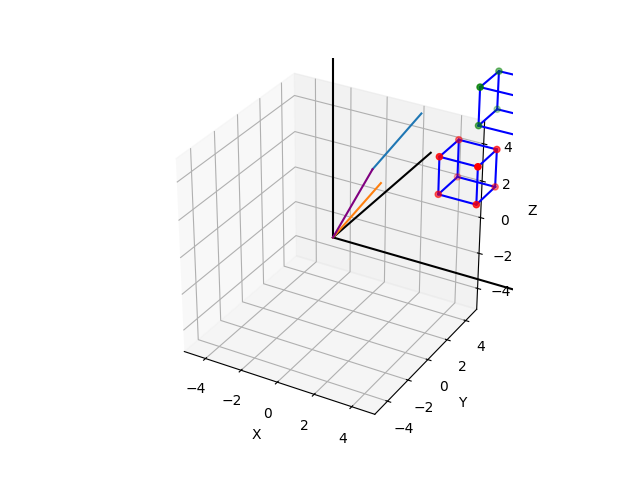

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='g')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    


#plot cube
ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')

line = line.T
ax.plot(line[:,0], line[:,1], line[:,2])
ax.plot(m_line[:,0], m_line[:,1], m_line[:,2])    
p_vec = np.array([[0, 0, 0], [point[0], point[1],point[2]]])
ax.plot(p_vec[:, 0], p_vec[:, 1], p_vec[:, 2], color='purple')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")



plt.show()

### Rotation by Ox

In [15]:
m_rx_vertices = m_vertices.dot(R_x)
m_rx_line = m_line.dot(R_x)

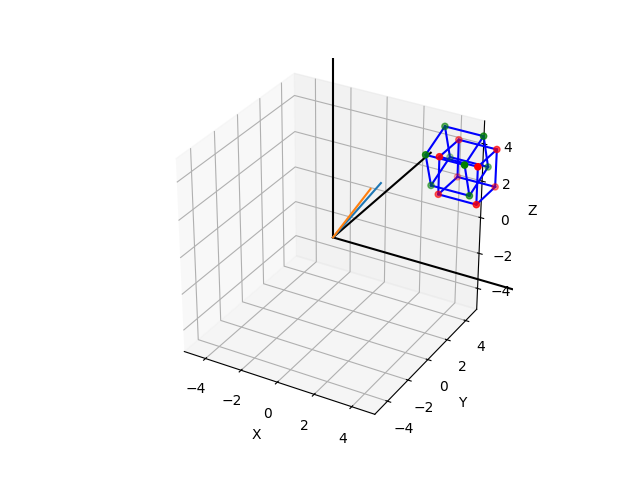

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')
    


#plot cube
ax.scatter(m_rx_vertices[:,0], m_rx_vertices[:,1], m_rx_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rx_vertices[edge[0]][0], m_rx_vertices[edge[1]][0]],
            [m_rx_vertices[edge[0]][1], m_rx_vertices[edge[1]][1]],
            [m_rx_vertices[edge[0]][2], m_rx_vertices[edge[1]][2]], color='b')


ax.plot(m_line[:,0], m_line[:,1], m_line[:,2])   
ax.plot(m_rx_line[:,0], m_rx_line[:,1], m_rx_line[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

### Rotation by Oy

In [17]:
m_rxy_vertices = m_rx_vertices.dot(R_y)
m_rxy_line = m_rx_line.dot(R_y)

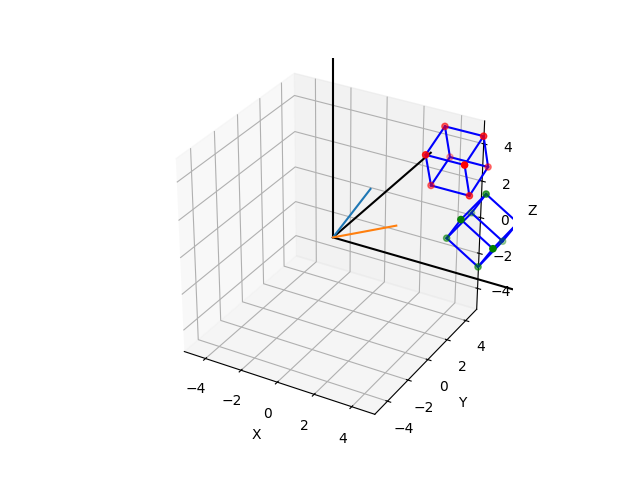

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rx_vertices[:,0], m_rx_vertices[:,1], m_rx_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rx_vertices[edge[0]][0], m_rx_vertices[edge[1]][0]],
            [m_rx_vertices[edge[0]][1], m_rx_vertices[edge[1]][1]],
            [m_rx_vertices[edge[0]][2], m_rx_vertices[edge[1]][2]], color='b')
    

#plot cube
ax.scatter(m_rxy_vertices[:,0], m_rxy_vertices[:,1], m_rxy_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxy_vertices[edge[0]][0], m_rxy_vertices[edge[1]][0]],
            [m_rxy_vertices[edge[0]][1], m_rxy_vertices[edge[1]][1]],
            [m_rxy_vertices[edge[0]][2], m_rxy_vertices[edge[1]][2]], color='b')


ax.plot(m_rx_line[:,0], m_rx_line[:,1], m_rx_line[:,2])
ax.plot(m_rxy_line[:,0], m_rxy_line[:,1], m_rxy_line[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

### Rotation by Oz with the chosen angle in constants (see **Set up the constants**)

In [19]:
m_rxyz_vertices = m_rxy_vertices.dot(R_z)
m_rxyz_line = m_rxy_line.dot(R_z)

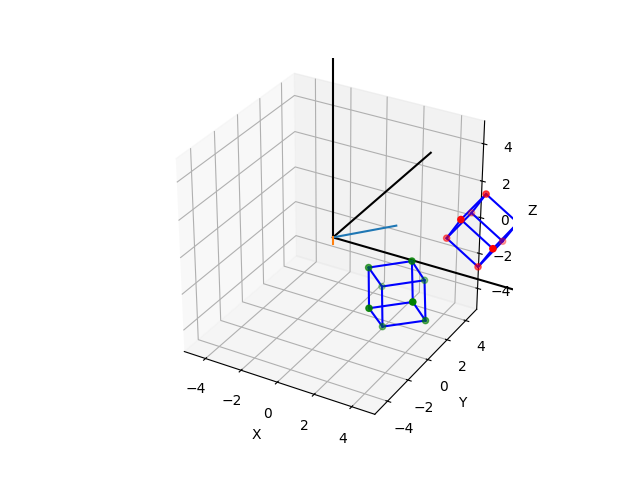

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxy_vertices[:,0], m_rxy_vertices[:,1], m_rxy_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxy_vertices[edge[0]][0], m_rxy_vertices[edge[1]][0]],
            [m_rxy_vertices[edge[0]][1], m_rxy_vertices[edge[1]][1]],
            [m_rxy_vertices[edge[0]][2], m_rxy_vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyz_vertices[:,0], m_rxyz_vertices[:,1], m_rxyz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyz_vertices[edge[0]][0], m_rxyz_vertices[edge[1]][0]],
            [m_rxyz_vertices[edge[0]][1], m_rxyz_vertices[edge[1]][1]],
            [m_rxyz_vertices[edge[0]][2], m_rxyz_vertices[edge[1]][2]], color='b')
    
ax.plot(m_rxy_line[:,0], m_rxy_line[:,1], m_rxy_line[:,2])
ax.plot(m_rxyz_line[:,0], m_rxyz_line[:,1], m_rxyz_line[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

### Reverse transformations

In [21]:
m_rxyzdy_vertices = m_rxyz_vertices.dot(R_y.T)
m_rxyzdy_line = m_rxyz_line.dot(R_y.T)

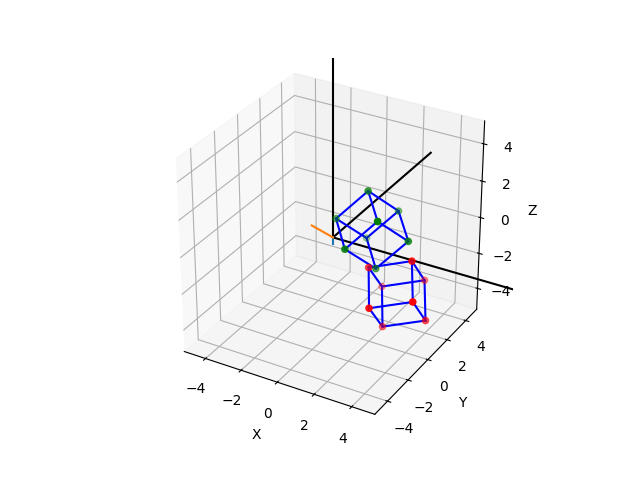

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyz_vertices[:,0], m_rxyz_vertices[:,1], m_rxyz_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyz_vertices[edge[0]][0], m_rxyz_vertices[edge[1]][0]],
            [m_rxyz_vertices[edge[0]][1], m_rxyz_vertices[edge[1]][1]],
            [m_rxyz_vertices[edge[0]][2], m_rxyz_vertices[edge[1]][2]], color='b')
   
#plot cube
ax.scatter(m_rxyzdy_vertices[:,0], m_rxyzdy_vertices[:,1], m_rxyzdy_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdy_vertices[edge[0]][0], m_rxyzdy_vertices[edge[1]][0]],
            [m_rxyzdy_vertices[edge[0]][1], m_rxyzdy_vertices[edge[1]][1]],
            [m_rxyzdy_vertices[edge[0]][2], m_rxyzdy_vertices[edge[1]][2]], color='b')
    

ax.plot(m_rxyz_line[:,0], m_rxyz_line[:,1], m_rxyz_line[:,2])
ax.plot(m_rxyzdy_line[:,0], m_rxyzdy_line[:,1], m_rxyzdy_line[:,2])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [23]:
m_rxyzdydx_vertices = m_rxyzdy_vertices.dot(R_x.T)
m_rxyzdydx_line = m_rxyzdy_line.dot(R_x.T)

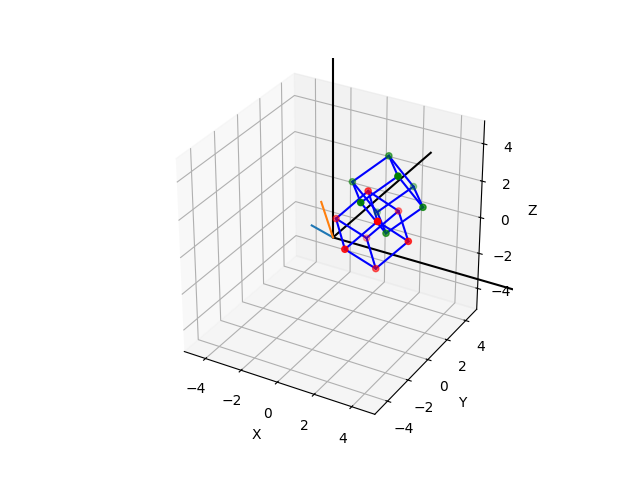

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyzdy_vertices[:,0], m_rxyzdy_vertices[:,1], m_rxyzdy_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyzdy_vertices[edge[0]][0], m_rxyzdy_vertices[edge[1]][0]],
            [m_rxyzdy_vertices[edge[0]][1], m_rxyzdy_vertices[edge[1]][1]],
            [m_rxyzdy_vertices[edge[0]][2], m_rxyzdy_vertices[edge[1]][2]], color='b')
 
#plot cube
ax.scatter(m_rxyzdydx_vertices[:,0], m_rxyzdydx_vertices[:,1], m_rxyzdydx_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_vertices[edge[0]][0], m_rxyzdydx_vertices[edge[1]][0]],
            [m_rxyzdydx_vertices[edge[0]][1], m_rxyzdydx_vertices[edge[1]][1]],
            [m_rxyzdydx_vertices[edge[0]][2], m_rxyzdydx_vertices[edge[1]][2]], color='b')
    
ax.plot(m_rxyzdy_line[:,0], m_rxyzdy_line[:,1], m_rxyzdy_line[:,2])
ax.plot(m_rxyzdydx_line[:,0], m_rxyzdydx_line[:,1], m_rxyzdydx_line[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [25]:
m_rxyzdydx_dm_vertices = m_rxyzdydx_vertices.dot(M_transpose_from_0.T)
m_rxyzdydx_dm_line = m_rxyzdydx_line.dot(M_transpose_from_0.T)

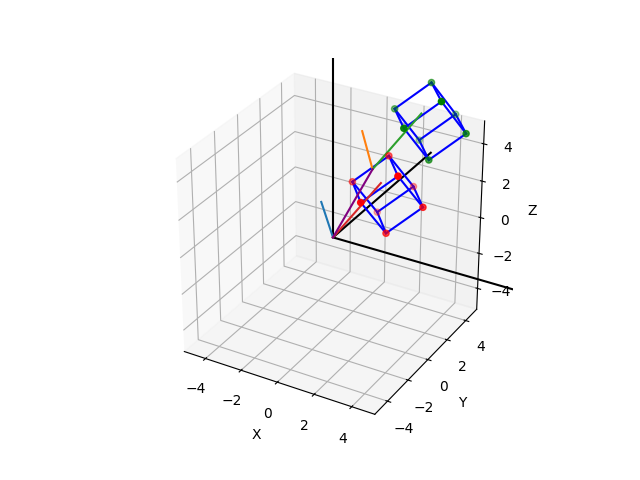

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyzdydx_vertices[:,0], m_rxyzdydx_vertices[:,1], m_rxyzdydx_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyzdydx_vertices[edge[0]][0], m_rxyzdydx_vertices[edge[1]][0]],
            [m_rxyzdydx_vertices[edge[0]][1], m_rxyzdydx_vertices[edge[1]][1]],
            [m_rxyzdydx_vertices[edge[0]][2], m_rxyzdydx_vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyzdydx_dm_vertices[:,0], m_rxyzdydx_dm_vertices[:,1], m_rxyzdydx_dm_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_dm_vertices[edge[0]][0], m_rxyzdydx_dm_vertices[edge[1]][0]],
            [m_rxyzdydx_dm_vertices[edge[0]][1], m_rxyzdydx_dm_vertices[edge[1]][1]],
            [m_rxyzdydx_dm_vertices[edge[0]][2], m_rxyzdydx_dm_vertices[edge[1]][2]], color='b')
    
ax.plot(m_rxyzdydx_line[:,0], m_rxyzdydx_line[:,1], m_rxyzdydx_line[:,2])
ax.plot(m_rxyzdydx_dm_line[:,0], m_rxyzdydx_dm_line[:,1], m_rxyzdydx_dm_line[:,2])
ax.plot(line[:,0], line[:,1], line[:,2])
ax.plot(m_line[:,0], m_line[:,1], m_line[:,2])
ax.plot(p_vec[:, 0], p_vec[:, 1], p_vec[:, 2], color='purple')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

## Result

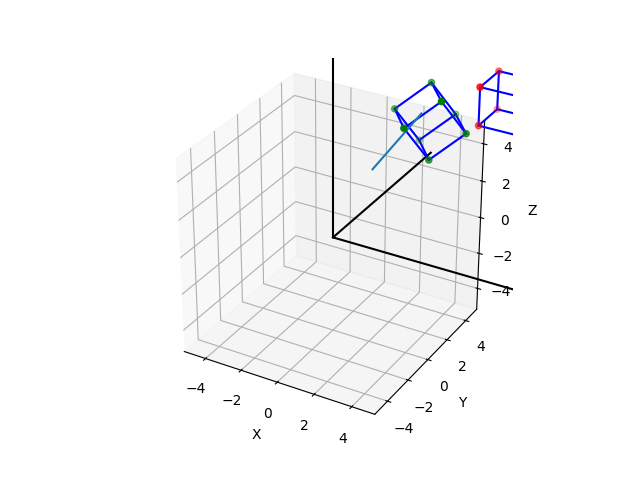

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyzdydx_dm_vertices[:,0], m_rxyzdydx_dm_vertices[:,1], m_rxyzdydx_dm_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_dm_vertices[edge[0]][0], m_rxyzdydx_dm_vertices[edge[1]][0]],
            [m_rxyzdydx_dm_vertices[edge[0]][1], m_rxyzdydx_dm_vertices[edge[1]][1]],
            [m_rxyzdydx_dm_vertices[edge[0]][2], m_rxyzdydx_dm_vertices[edge[1]][2]], color='b')

#plot init line
# ax.plot(m_rxyzdydx_line[:,0], m_rxyzdydx_line[:,1], m_rxyzdydx_line[:,2])
# ax.plot(m_rxyzdydx_dm_line[:,0], m_rxyzdydx_dm_line[:,1], m_rxyzdydx_dm_line[:,2])
ax.plot(line[:,0], line[:,1], line[:,2])
# ax.plot(m_line[:,0], m_line[:,1], m_line[:,2])
# ax.plot(p_vec[:, 0], p_vec[:, 1], p_vec[:, 2], color='purple')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

# Task 5

## Set up the constants

In [28]:
vertices = np.array([
    [5, 5, 5, 1],
    [7, 5, 5, 1],
    [7, 7, 5, 1],
    [5, 7, 5, 1],
    [5, 5, 7, 1],
    [7, 5, 7, 1],
    [7, 7, 7, 1],
    [5, 7, 7, 1]
])


points = np.array([[3, 4, 5],
                  [1, 6, 4],
                  [7, 1, 3]])
draw_points = np.hstack((points[0], points[1], points[2], points[0]+(points[0]-points[1]), points[0]+(points[0]-points[2])))
draw_points.resize((5, 3))
print(draw_points)

def calcABCD_nvsqrt_normv(points):
    # print('calc points:',points)
    A_eq = np.array([[points[1][1]-points[0][1], points[1][2]-points[0][2]],
                     [points[2][1]-points[0][1], points[2][2]-points[0][2]]])
    A = np.linalg.det(A_eq)
    
    B_eq = np.array([[points[1][0]-points[0][0], points[1][2]-points[0][2]],
                     [points[2][0]-points[0][0], points[2][2]-points[0][2]]])
    B = np.linalg.det(B_eq)*-1
    
    C_eq = np.array([[points[1][0]-points[0][0], points[1][1]-points[0][1]],
                     [points[2][0]-points[0][0], points[2][1]-points[0][1]]])
    C = np.linalg.det(C_eq)
    
    D = -points[0][0]*A -points[0][1]*B -points[0][2]*C
    
    nv_sqrt = m.sqrt(A**2+B**2+C**2)
    normal_v = np.array([A/nv_sqrt, B/nv_sqrt, C/nv_sqrt, 1])
    return A, B, C, D, nv_sqrt, normal_v

A, B, C, D, nv_sqrt, normal_v = calcABCD_nvsqrt_normv(points)
print('A, B, C, D, nv_sqrt, normal_v:', A, B, C, D, nv_sqrt, normal_v)
print('D/C: ', D/C)

[[ 3  4  5]
 [ 1  6  4]
 [ 7  1  3]
 [ 5  2  6]
 [-1  7  7]]
A, B, C, D, nv_sqrt, normal_v: -6.999999999999999 -7.999999999999998 -2.0 62.999999999999986 10.816653826391965 [-0.64715023 -0.73960026 -0.18490007  1.        ]
D/C:  -31.499999999999993


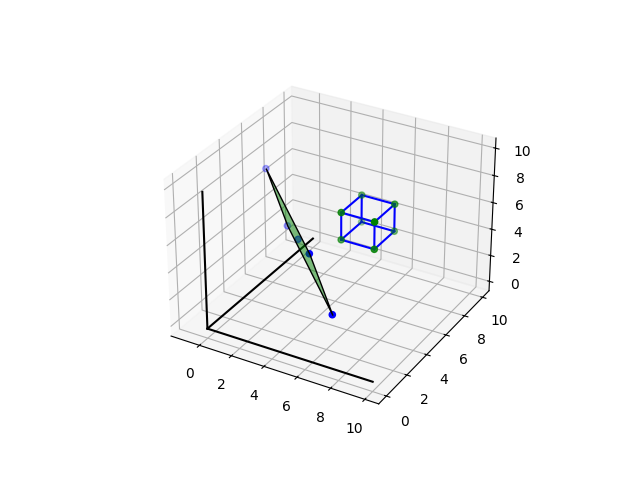

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='g')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(draw_points[:, 0], draw_points[:, 1], draw_points[:, 2], color='b')
space = [[draw_points[1], draw_points[2], draw_points[3], draw_points[4]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))


## Set up transformations

In [30]:
M_to_0 = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, D/C],
                 [0, 0, 0, 1]])
cosfi = A/m.sqrt(A**2 + B**2)
sinfi = B/m.sqrt(A**2 + B**2)

Rz = np.array([[cosfi, sinfi, 0, 0], 
               [-sinfi, cosfi, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])
print('normal_v = ',normal_v)
P = Rz.dot(normal_v.T)
print('P = Rz×n̄ = ',P)

cosxi = C/nv_sqrt
sinxi = m.sqrt(A**2 + B**2)/nv_sqrt
Ry = np.array([[cosxi, 0, -sinxi, 0], 
               [0, 1, 0, 0], 
               [sinxi, 0, cosxi, 0],
               [0, 0, 0, 1]])
print('Ry×P = ', Ry.dot(P.T))

R_refl_z = np.array([[1, 0, 0, 0], 
                   [0, 1, 0, 0], 
                   [0, 0, -1, 0], 
                   [0, 0, 0, 1]])


M_from_0 = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, -D/C],
                 [0, 0, 0, 1]])

normal_v =  [-0.64715023 -0.73960026 -0.18490007  1.        ]
P = Rz×n̄ =  [ 0.98275733  0.         -0.18490007  1.        ]
Ry×P =  [2.77555756e-17 0.00000000e+00 1.00000000e+00 1.00000000e+00]


## Transformations

### Move to zero

In [31]:
m_vertices = M_to_0.dot(vertices.T).T
m_draw_points = M_to_0.dot(np.stack((draw_points[:, 0], draw_points[:, 1], draw_points[:, 2], np.ones(len(draw_points))))).T
print(draw_points)
print(m_draw_points)
print(np.stack((draw_points[:, 0], draw_points[:, 1], draw_points[:, 2], np.ones(len(draw_points)))))

[[ 3  4  5]
 [ 1  6  4]
 [ 7  1  3]
 [ 5  2  6]
 [-1  7  7]]
[[  3.    4.  -26.5   1. ]
 [  1.    6.  -27.5   1. ]
 [  7.    1.  -28.5   1. ]
 [  5.    2.  -25.5   1. ]
 [ -1.    7.  -24.5   1. ]]
[[ 3.  1.  7.  5. -1.]
 [ 4.  6.  1.  2.  7.]
 [ 5.  4.  3.  6.  7.]
 [ 1.  1.  1.  1.  1.]]


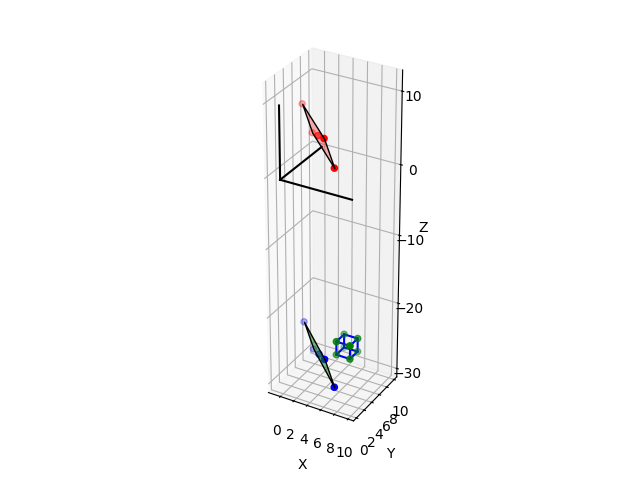

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(draw_points[:, 0], draw_points[:, 1], draw_points[:, 2], color='r')
space = [[draw_points[1], draw_points[2], draw_points[3], draw_points[4]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

ax.scatter(m_draw_points[:, 0], m_draw_points[:, 1], m_draw_points[:, 2], color='b')
space = [[m_draw_points[1, :-1], m_draw_points[2, :-1], m_draw_points[3, :-1], m_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

In [33]:
print(m_draw_points)
mA, mB, mC, mD, sqrts, mnorm_v = calcABCD_nvsqrt_normv(m_draw_points[:3, :3])
print('n̄ after move', mnorm_v)

[[  3.    4.  -26.5   1. ]
 [  1.    6.  -27.5   1. ]
 [  7.    1.  -28.5   1. ]
 [  5.    2.  -25.5   1. ]
 [ -1.    7.  -24.5   1. ]]
n̄ after move [-0.64715023 -0.73960026 -0.18490007  1.        ]


### Rotation by Oz

In [34]:
m_rz_vertices = Rz.dot(m_vertices.T).T
m_rz_draw_points = Rz.dot(m_draw_points.T).T

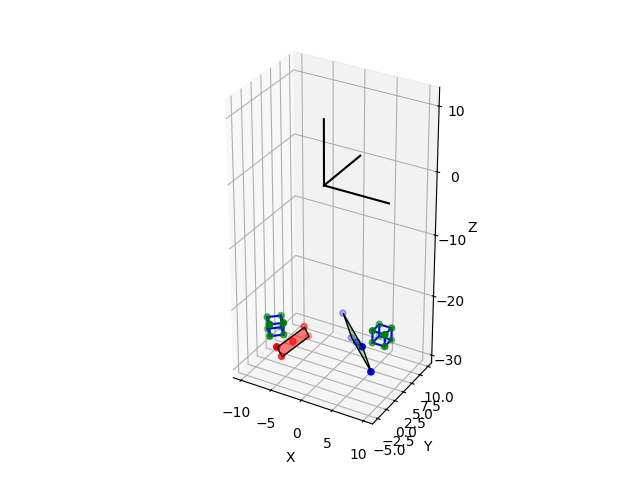

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis


ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')
    
ax.scatter(m_rz_vertices[:,0], m_rz_vertices[:,1], m_rz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rz_vertices[edge[0]][0], m_rz_vertices[edge[1]][0]],
            [m_rz_vertices[edge[0]][1], m_rz_vertices[edge[1]][1]],
            [m_rz_vertices[edge[0]][2], m_rz_vertices[edge[1]][2]], color='b')
    

# paint Space
# m_draw_points = m_draw_points.T
ax.scatter(m_draw_points[:, 0], m_draw_points[:, 1], m_draw_points[:, 2], color='b')
space = [[m_draw_points[1, :-1], m_draw_points[2, :-1], m_draw_points[3, :-1], m_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.3))

ax.scatter(m_rz_draw_points[:, 0], m_rz_draw_points[:, 1], m_rz_draw_points[:, 2], color='r')
space = [[m_rz_draw_points[1, :-1], m_rz_draw_points[2, :-1], m_rz_draw_points[3, :-1], m_rz_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

### Rotation by Oy

In [36]:
m_rzry_vertices = Ry.dot(m_rz_vertices.T).T
m_rzry_draw_points = Ry.dot(m_rz_draw_points.T)

print(m_rzry_draw_points.T)
oyA, oyB, oyC, oyD, oynv_sqrt, oynormal_v = calcABCD_nvsqrt_normv((m_rz_vertices.T)[:3, :3])
print('A', oyA, '\nB', oyB, '\nC', oyC, '\nD', oyD, '\nn̄', oynormal_v)

[[ 2.69649477e+01 -3.76288347e-01 -3.70104412e-16  1.00000000e+00]
 [ 2.79824929e+01 -3.19845095e+00  1.85007100e-16  1.00000000e+00]
 [ 2.90000381e+01  4.60953226e+00 -1.48059807e-16  1.00000000e+00]
 [ 2.59474026e+01  2.44587426e+00  8.51140915e-16  1.00000000e+00]
 [ 2.49298574e+01 -5.36210895e+00  2.96029403e-16  1.00000000e+00]]
A 18.98582060243305 
B -79.77312963892898 
C 64.78730903649598 
D 106.00000000000034 
n̄ [ 0.18167119 -0.76333173  0.61993568  1.        ]


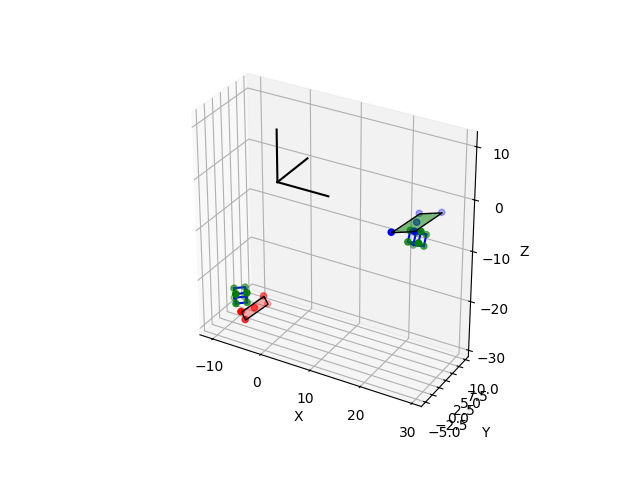

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_rz_vertices[:,0], m_rz_vertices[:,1], m_rz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rz_vertices[edge[0]][0], m_rz_vertices[edge[1]][0]],
            [m_rz_vertices[edge[0]][1], m_rz_vertices[edge[1]][1]],
            [m_rz_vertices[edge[0]][2], m_rz_vertices[edge[1]][2]], color='b')
    

ax.scatter(m_rzry_vertices[:,0], m_rzry_vertices[:,1], m_rzry_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_vertices[edge[0]][0], m_rzry_vertices[edge[1]][0]],
            [m_rzry_vertices[edge[0]][1], m_rzry_vertices[edge[1]][1]],
            [m_rzry_vertices[edge[0]][2], m_rzry_vertices[edge[1]][2]], color='b')
    

# paint Space
# m_draw_points = m_draw_points.T
ax.scatter(m_rz_draw_points[:, 0], m_rz_draw_points[:, 1], m_rz_draw_points[:, 2], color='r')
space = [[m_rz_draw_points[1, :-1], m_rz_draw_points[2, :-1], m_rz_draw_points[3, :-1], m_rz_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

m_rzry_draw_points = m_rzry_draw_points.T
ax.scatter(m_rzry_draw_points[:, 0], m_rzry_draw_points[:, 1], m_rzry_draw_points[:, 2], color='b')
space = [[m_rzry_draw_points[1, :-1], m_rzry_draw_points[2, :-1], m_rzry_draw_points[3, :-1], m_rzry_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

### Reflexion

In [38]:
m_rzry_refl_vertices = R_refl_z.dot(m_rzry_vertices.T).T
m_rzty_refl_draw_points = R_refl_z.dot(m_rzry_draw_points.T)

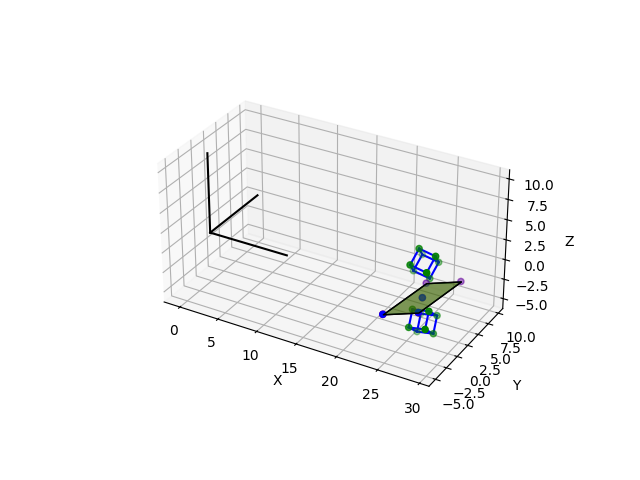

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_rzry_vertices[:,0], m_rzry_vertices[:,1], m_rzry_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_vertices[edge[0]][0], m_rzry_vertices[edge[1]][0]],
            [m_rzry_vertices[edge[0]][1], m_rzry_vertices[edge[1]][1]],
            [m_rzry_vertices[edge[0]][2], m_rzry_vertices[edge[1]][2]], color='b')
    

ax.scatter(m_rzry_refl_vertices[:,0], m_rzry_refl_vertices[:,1], m_rzry_refl_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_refl_vertices[edge[0]][0], m_rzry_refl_vertices[edge[1]][0]],
            [m_rzry_refl_vertices[edge[0]][1], m_rzry_refl_vertices[edge[1]][1]],
            [m_rzry_refl_vertices[edge[0]][2], m_rzry_refl_vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(m_rzry_draw_points[:, 0], m_rzry_draw_points[:, 1], m_rzry_draw_points[:, 2], color='r')
space = [[m_rzry_draw_points[1, :-1], m_rzry_draw_points[2, :-1], m_rzry_draw_points[3, :-1], m_rzry_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

m_rzty_refl_draw_points = m_rzty_refl_draw_points.T
ax.scatter(m_rzty_refl_draw_points[:, 0], m_rzty_refl_draw_points[:, 1], m_rzty_refl_draw_points[:, 2], color='b')
space = [[m_rzty_refl_draw_points[1, :-1], m_rzty_refl_draw_points[2, :-1], m_rzty_refl_draw_points[3, :-1], m_rzty_refl_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

### Reverse transformaions

In [40]:
m_rzry_refl_dry_vertices = Ry.dot(m_rzry_refl_vertices.T).T
m_rzty_refl_dry_draw_points = Ry.dot(m_rzty_refl_draw_points.T)

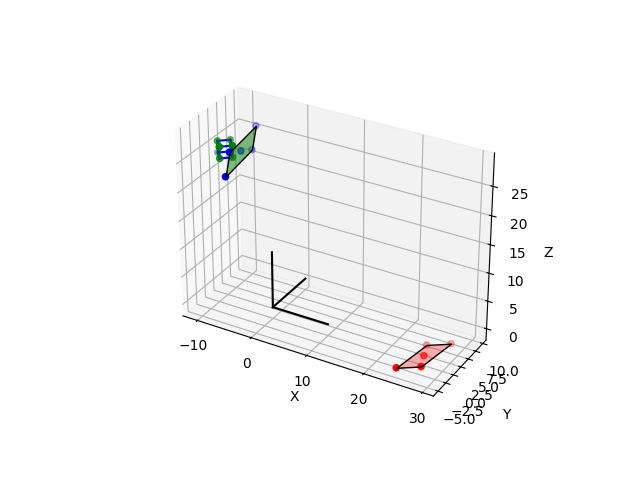

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_rzry_refl_dry_vertices[:,0], m_rzry_refl_dry_vertices[:,1], m_rzry_refl_dry_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_refl_dry_vertices[edge[0]][0], m_rzry_refl_dry_vertices[edge[1]][0]],
            [m_rzry_refl_dry_vertices[edge[0]][1], m_rzry_refl_dry_vertices[edge[1]][1]],
            [m_rzry_refl_dry_vertices[edge[0]][2], m_rzry_refl_dry_vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(m_rzty_refl_draw_points[:, 0], m_rzty_refl_draw_points[:, 1], m_rzty_refl_draw_points[:, 2], color='r')
space = [[m_rzty_refl_draw_points[1, :-1], m_rzty_refl_draw_points[2, :-1], m_rzty_refl_draw_points[3, :-1], m_rzty_refl_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

m_rzty_refl_dry_draw_points = m_rzty_refl_dry_draw_points.T
ax.scatter(m_rzty_refl_dry_draw_points[:, 0], m_rzty_refl_dry_draw_points[:, 1], m_rzty_refl_dry_draw_points[:, 2], color='b')
space = [[m_rzty_refl_dry_draw_points[1, :-1], m_rzty_refl_dry_draw_points[2, :-1], m_rzty_refl_dry_draw_points[3, :-1], m_rzty_refl_dry_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

In [42]:
m_rzry_refl_drydrz_vertices = m_rzry_refl_dry_vertices.dot(Rz)
m_rzty_refl_drydrz_draw_points = Rz.dot(m_rzty_refl_dry_draw_points.T)

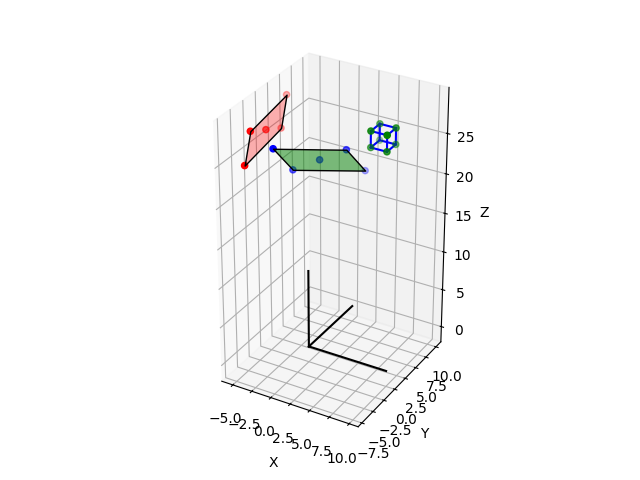

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_rzry_refl_drydrz_vertices[:,0], m_rzry_refl_drydrz_vertices[:,1], m_rzry_refl_drydrz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_refl_drydrz_vertices[edge[0]][0], m_rzry_refl_drydrz_vertices[edge[1]][0]],
            [m_rzry_refl_drydrz_vertices[edge[0]][1], m_rzry_refl_drydrz_vertices[edge[1]][1]],
            [m_rzry_refl_drydrz_vertices[edge[0]][2], m_rzry_refl_drydrz_vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(m_rzty_refl_dry_draw_points[:, 0], m_rzty_refl_dry_draw_points[:, 1], m_rzty_refl_dry_draw_points[:, 2], color='r')
space = [[m_rzty_refl_dry_draw_points[1, :-1], m_rzty_refl_dry_draw_points[2, :-1], m_rzty_refl_dry_draw_points[3, :-1], m_rzty_refl_dry_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

m_rzty_refl_drydrz_draw_points = m_rzty_refl_drydrz_draw_points.T
ax.scatter(m_rzty_refl_drydrz_draw_points[:, 0], m_rzty_refl_drydrz_draw_points[:, 1], m_rzty_refl_drydrz_draw_points[:, 2], color='b')
space = [[m_rzty_refl_drydrz_draw_points[1, :-1], m_rzty_refl_drydrz_draw_points[2, :-1], m_rzty_refl_drydrz_draw_points[3, :-1], m_rzty_refl_drydrz_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

In [44]:
m_rzry_refl_drydrz_dm_vertices = m_rzry_refl_drydrz_vertices.dot(M_from_0.T)
m_rzty_refl_drydrz_dm_draw_points = M_from_0.dot(m_rzty_refl_drydrz_draw_points.T)

C:\Users\glebo\AppData\Local\Temp\ipykernel_13856\3966171283.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


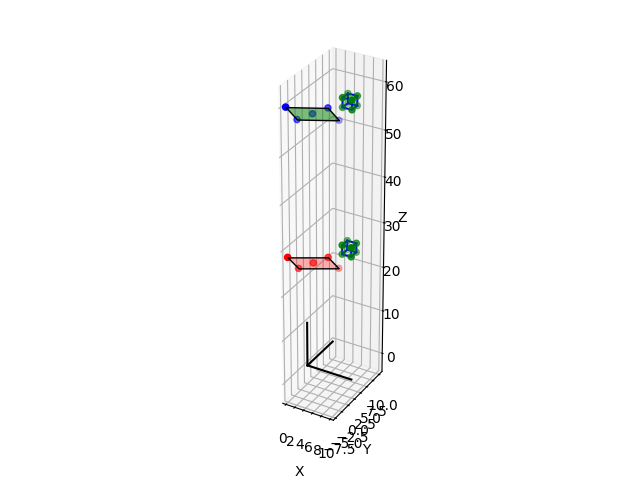

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

ax.scatter(m_rzry_refl_drydrz_vertices[:,0], m_rzry_refl_drydrz_vertices[:,1], m_rzry_refl_drydrz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_refl_drydrz_vertices[edge[0]][0], m_rzry_refl_drydrz_vertices[edge[1]][0]],
            [m_rzry_refl_drydrz_vertices[edge[0]][1], m_rzry_refl_drydrz_vertices[edge[1]][1]],
            [m_rzry_refl_drydrz_vertices[edge[0]][2], m_rzry_refl_drydrz_vertices[edge[1]][2]], color='b')
   

ax.scatter(m_rzry_refl_drydrz_dm_vertices[:,0], m_rzry_refl_drydrz_dm_vertices[:,1], m_rzry_refl_drydrz_dm_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rzry_refl_drydrz_dm_vertices[edge[0]][0], m_rzry_refl_drydrz_dm_vertices[edge[1]][0]],
            [m_rzry_refl_drydrz_dm_vertices[edge[0]][1], m_rzry_refl_drydrz_dm_vertices[edge[1]][1]],
            [m_rzry_refl_drydrz_dm_vertices[edge[0]][2], m_rzry_refl_drydrz_dm_vertices[edge[1]][2]], color='b')
    

# paint Space
ax.scatter(m_rzty_refl_drydrz_draw_points[:, 0], m_rzty_refl_drydrz_draw_points[:, 1], m_rzty_refl_drydrz_draw_points[:, 2], color='r')
space = [[m_rzty_refl_drydrz_draw_points[1, :-1], m_rzty_refl_drydrz_draw_points[2, :-1], m_rzty_refl_drydrz_draw_points[3, :-1], m_rzty_refl_drydrz_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='r', linewidths=1, edgecolors='k', alpha=0.3))

m_rzty_refl_drydrz_dm_draw_points = m_rzty_refl_drydrz_dm_draw_points.T
ax.scatter(m_rzty_refl_drydrz_dm_draw_points[:, 0], m_rzty_refl_drydrz_dm_draw_points[:, 1], m_rzty_refl_drydrz_dm_draw_points[:, 2], color='b')
space = [[m_rzty_refl_drydrz_dm_draw_points[1, :-1], m_rzty_refl_drydrz_dm_draw_points[2, :-1], m_rzty_refl_drydrz_dm_draw_points[3, :-1], m_rzty_refl_drydrz_dm_draw_points[4, :-1]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")

## Result

In [46]:
result_vertices = (M_from_0).dot(Rz.T).dot(Ry.T).dot(R_refl_z).dot(Ry).dot(Rz).dot(M_to_0).dot(vertices.T).T


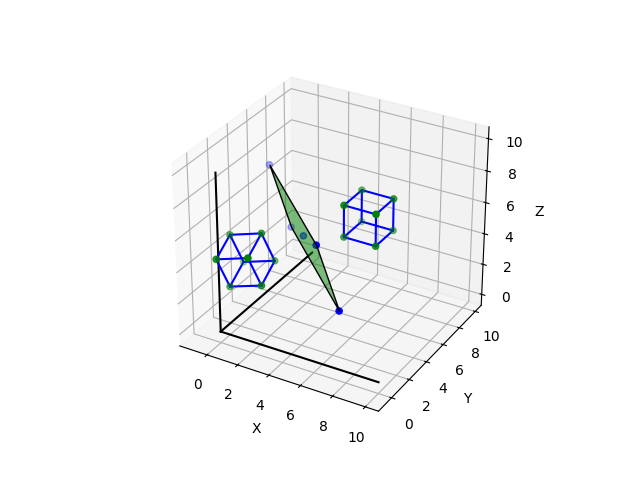

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis
    

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='g')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    

ax.scatter(result_vertices[:,0], result_vertices[:,1], result_vertices[:,2], color='g')

for edge in edges:
    ax.plot([result_vertices[edge[0]][0], result_vertices[edge[1]][0]],
            [result_vertices[edge[0]][1], result_vertices[edge[1]][1]],
            [result_vertices[edge[0]][2], result_vertices[edge[1]][2]], color='b')

# paint Space
ax.scatter(draw_points[:, 0], draw_points[:, 1], draw_points[:, 2], color='b')
space = [[draw_points[1], draw_points[2], draw_points[3], draw_points[4]]]
ax.add_collection3d(Poly3DCollection(space, facecolors='g', linewidths=1, edgecolors='k', alpha=0.5))




ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.gca().set_aspect("equal")